In [ ]:
# This program detects if a patient has diabetes or not

In [ ]:
# load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# store the dataset
df = pd.read_csv('diabetes.csv')

# print the first 5 rows of data
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# show the data shape
df.shape

(768, 9)

In [ ]:
# check for duplicates if any & remove them
df.drop_duplicates(inplace = True)
df.shape

(768, 9)

In [ ]:
# show the number of missing data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
# get all of the rows from the first eight columns of the dataset
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
# process the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
# split the data into 80% training & 20% testing
X_train, X_test,y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [ ]:
# build the model
model = Sequential([
    Dense(12, activation='relu', input_shape=(8,)),
    Dense(15, activation='relu'),
    Dense(1, activation = 'sigmoid')

]
)

In [ ]:
# compile the model
model.compile(
    optimizer = 'sgd', 
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (614, 8)
X_test shape:  (154, 8)


In [ ]:
# train the model
hist = model.fit(X_train, y_train, batch_size = 57, epochs = 1000, validation_split=0.2 )

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 594us/step - loss: 0.6782 - accuracy: 0.6477 - val_loss: 0.6772 - val_accuracy: 0.6504
Epoch 2/1000
491/491 [==============================] - 0s 41us/step - loss: 0.6761 - accuracy: 0.6477 - val_loss: 0.6751 - val_accuracy: 0.6504
Epoch 3/1000
491/491 [==============================] - 0s 33us/step - loss: 0.6740 - accuracy: 0.6477 - val_loss: 0.6733 - val_accuracy: 0.6504
Epoch 4/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6724 - accuracy: 0.6477 - val_loss: 0.6716 - val_accuracy: 0.6504
Epoch 5/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6709 - accuracy: 0.6477 - val_loss: 0.6702 - val_accuracy: 0.6504
Epoch 6/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6695 - accuracy: 0.6477 - val_loss: 0.6688 - val_accuracy: 0.6504
Epoch 7/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6683

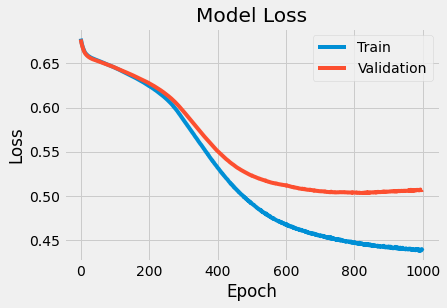

In [ ]:
# visualize the training loss & the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper right')
plt.show()

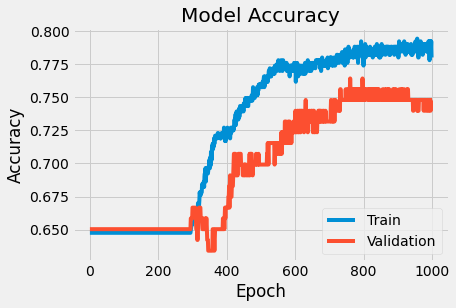

In [ ]:
# visualize the training accuracy & the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'lower right')
plt.show()

In [ ]:
# make a prediction & print the actual values
prediction = model.predict(X_test)
prediction = [1 if y>=0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [ ]:
# evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       398
         1.0       0.73      0.61      0.66       216

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614

Confusion Matrix: 
 [[349  49]
 [ 84 132]]

Accuracy:  0.7833876221498371


In [ ]:
# evaluate the model on the testing dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       102
         1.0       0.65      0.65      0.65        52

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix: 
 [[84 18]
 [18 34]]

Accuracy:  0.7662337662337663
